# Analysis for once-through scenarios
This notebook provides analysis for all of the once-through fuel cycle scenarios that are included in 
Amanda Bachmann's dissertation. Analysis of each scenario includes the number of reactors deployed, the uranium resources, the SWU capacity, and the amount of waste produced. 

Scenarios are numbers as follows:
* 1: LWRs
* 2: MMR, no growth
* 3: Xe-100, no growth
* 4: Xe-100 and MMR, no growth
* 5: MMR and VOYGR, no growth
* 6: Xe-100 and VOYGR, no growth
* 7: Xe-100, MMR, and VOYGR, no growth
* 8: MMR, 1% growth
* 9: Xe-100, 1% growth
* 10: Xe-100 and MMR, 1% growth
* 11: MMR and VOYGR, 1% growth
* 12: Xe-100 and VOYGR, 1% growth
* 13: Xe-100, MMR, and VOYGR, 1% growth

Analysis of scenario 1 is performed separately, then the no growth scenarios are all analyzed together, followed by the 1% growth scenarios. 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sys

import cymetric as cym
sys.path.insert(0,'../../../scripts')
import transition_metrics as tm

In [2]:
# enrichment assays
leu_p = 0.043
mmr_p = 0.13
xe_p = 0.155
voygr_p = 0.0409
x_f = 0.00711
x_t = 0.002

## Scenario 1

In [3]:
s1_outfile = "../outputs/united_states_2020.sqlite"

../../../scripts/transition_metrics.py:144: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Year'][index] = np.round(df['Time'][index] / 12 + 1965, 2)


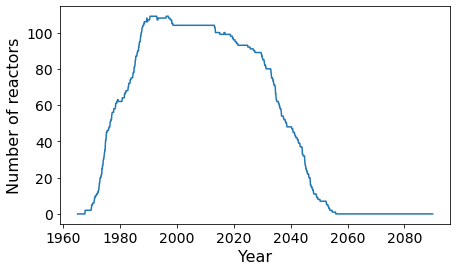

In [5]:
# Reactor Deployment
s1_nonlwr = ['Sink_HLW', 'Sink_LLW', 'Mine',
                 'Enrichment', 'DryStorage', 'United States',
                 'WetStorage', 'FuelCycle', 'UNITED_STATES_OF_AMERICA']
s1_reactors = tm.rx_commission_decommission(s1_outfile, s1_nonlwr)
s1_reactors = tm.add_year(s1_reactors)

plt.figure(figsize=(7,4))
plt.plot(s1_reactors['Year'], s1_reactors['lwr_total'])
plt.xlabel('Year', size=16)
plt.ylabel('Number of reactors', size=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.savefig('figures/s1_reactors.pdf')

In [9]:
s1_metrics = tm.get_metrics(s1_outfile)
s1_agents = s1_metrics.eval("Agents")
s1_lwrs = s1_agents.loc[s1_agents['Spec'] == ':cycamore:Reactor']

In [11]:
print('Total Number of LWRs deployed:', len(s1_lwrs))
print('Max LWRs deployed:', s1_reactors['lwr_total'].max())
print('LWRS deployed in January 2025:', s1_reactors['lwr_total'][721])
print(s1_reactors[['lwr_total','Year']][1087:1095])

Total Number of LWRs deployed: 115
Max LWRs deployed: 109.0
LWRS deployed in January 2025: 92.0
Prototype  lwr_total     Year
1087             1.0  2055.58
1088             1.0  2055.67
1089             1.0  2055.75
1090             0.0  2055.83
1091             0.0  2055.92
1092             0.0  2056.00
1093             0.0  2056.08
1094             0.0  2056.17


In [16]:
#energy
s1_energy = tm.get_annual_electricity(s1_outfile)
s1_energy[55:60]

,Year,Energy
55,2022,90.417083
56,2023,90.846333
57,2024,90.042667
58,2025,89.456500
59,2026,88.280583


Annual electricity for 2025:89.45655 GWe-yr


Monthly electricity for 2025:
* January: 91.448
* February: 91.412
* March: 91.376
* April: 89.396
* May: 88.573
* June: 89.3
* July: 91.130
* August: 84.061
* Spetember: 86.184
* October: 91.514
* November:90.791
* December: 83.104

Text(0, 0.5, 'Energy (GWe-month)')

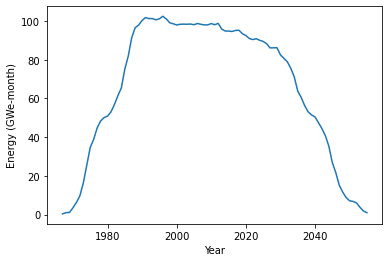

In [17]:
plt.plot(s1_energy['Year'], s1_energy['Energy'])
plt.xlabel('Year')
plt.ylabel('Energy (GWe-month)')

In [7]:
#Uranium resources sent to reactors
s1_transactions = pd.read_csv('current_transactions.csv', 
                                   usecols = ['Time','Commodity', 'Units',
                                             'Quantity','Prototype'])
s1_uox = tm.commodity_mass_traded(s1_transactions, 'fresh_uox')
plt.figure(figsize=(7,4))
plt.plot(s1_uox['Year'], s1_uox['Quantity']/1000)
#plt.legend(loc=2)
plt.ylabel('Mass (t)')
plt.xlabel('Year')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

#plt.title('Mass of uranium supplied to all reactors')
plt.savefig('figures/s1_fuelsupply.pdf')

FileNotFoundError: [Errno 2] No such file or directory: 'current_transactions.csv'

In [ ]:
print(s1_uox['Quantity'].max())
print(s1_uox['Quantity'].mean())
print(s1_uox['Quantity'][721:1089].mean())

In [ ]:
#Natural uranium needed
s1_tails = tm.calculate_tails(s1_uox['Quantity'], leu_p, x_t, x_f)
s1_feed = tm.calculate_feed(s1_uox['Quantity'], s1_tails)

plt.plot(s1_uox['Year'], s1_feed/1000)
plt.xlabel('Year', fontsize=16)
plt.ylabel('Mass (t)', fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.savefig('figures/s1_feed.pdf')

In [ ]:
print(s1_feed.max())
print(s1_feed.mean())
print(s1_feed[721:1089].mean())

In [ ]:
# SWU capacity 
s1_swu = tm.calculate_SWU(s1_uox['Quantity'], leu_p, s1_tails, x_t, s1_feed, x_f)
plt.plot(s1_uox["Year"], s1_swu)
plt.xlabel('Year')
plt.ylabel('SWU (kg-SWU)')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.savefig('figures/s1_swu.pdf')

In [ ]:
print(s1_swu.max())
print(s1_swu.mean())
print(s1_swu[721:1089].mean())

In [ ]:
# waste discharged
s1_waste = tm.commodity_mass_traded(s1_transactions, 'spent_uox')

plt.plot(s1_waste['Year'], s1_waste['Quantity']/1000)
plt.xlabel('Year', fontsize=16)
plt.ylabel('Mass (t)', fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.savefig('figures/s1_waste.pdf')

In [ ]:
print(s1_waste['Quantity'].max())
print(s1_waste['Quantity'].mean())
print(s1_waste['Quantity'][721:1089].mean())

## No growth scenarios

In [21]:
out_files = {'s2_outfile':"../outputs/mmr_nogrowth.sqlite",
            's3_outfile':"../outputs/xe100_nogrowth.sqlite",
            's4_outfile':"../outputs/xe100_mmr_nogrowth.sqlite",
            's5_outfile':"../outputs/mmr_voygr_nogrowth.sqlite",
            's6_outfile':"../outputs/xe100_voygr_nogrowth.sqlite",
            's7_outfile':"../outputs/xe100_mmr_voygr_nogrowth.sqlite",
            'n3_outfile':"../outputs/cyclus.sqlite"}

In [12]:
# Reactor Deployment Constants
non_lwr = ['Sink_HLW', 'Sink_LLW', 'Mine',
                 'Enrichment', 'DryStorage', 'United States',
                 'WetStorage', 'FuelCycle', 'UNITED_STATES_OF_AMERICA',
                 'MMR', 'Xe-100','VOYGR', 'Xe-100CoolingPool',
                 'MMRCoolingPool', 'VOYGRCoolingPool']

adv_rxs = ['MMR', 'Xe-100', 'VOYGR']

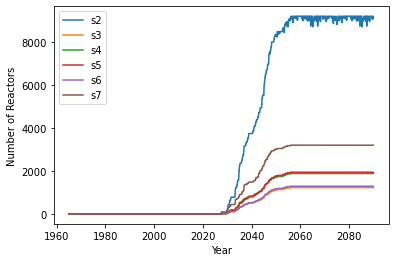

In [26]:
reactors = {'s2_reactors':"",
            's3_reactors':"",
            's4_reactors':"",
            's5_reactors':"",
            's6_reactors':"",
            's7_reactors':""}
for key in reactors:
    scenario = key[:2]
    reactors[key] = tm.get_prototype_totals(out_files[scenario+'_outfile'], non_lwr, adv_rxs)
    plt.plot(reactors[key]['Year'], reactors[key]['advrx_total'], label=scenario)
plt.xlabel('Year')
plt.ylabel('Number of Reactors')
plt.legend()
plt.savefig('figures/nogrowth_reactors.png', bbox_inches='tight')

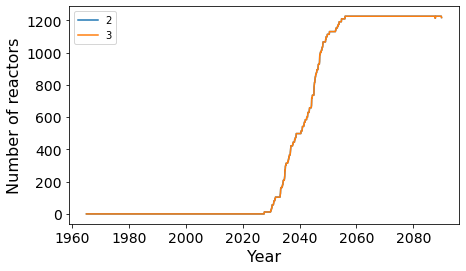

In [15]:
time = np.linspace(1965,2089, 65)
reactors = [s3_reactors, n3_reactors]
plt.figure(figsize=(7,4))
for reactor_index, reactor in enumerate(reactors):
    plt.plot(reactor['Year'], reactor['advrx_total'], label=reactor_index+2)

plt.xlabel('Year', size=16)
plt.ylabel('Number of reactors', size=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
#plt.yscale('log')
plt.legend()
#plt.savefig('figures/nogrowth_reactors.png', bbox_inches='tight')

In [41]:
for key in reactors:
    scenario = key[1]
    
    for adv_rx in adv_rxs:
        print(f'Max {adv_rx} in S{scenario}:', reactors[key][adv_rx +'_total'].max())
        print(f'Max {adv_rx} added in one step in S{scenario}:', reactors[key][adv_rx +'_enter'].max())
        prototype_sum = reactors[key][adv_rx +'_enter'].cumsum()
        print(f'Total number of {adv_rx} deployed in S{scenario};', prototype_sum.iloc[-1])
    print(f'Max Adv Rx in S{scenario}:', reactors[key]['advrx_total'].max())
    print(f'Max Adv Rx added in one step in S{scenario}:', reactors[key]['advrx_enter'].max())
    advrx_sum = reactors[key]['advrx_enter'].cumsum()
    print(f'Total number of reactors deployed in S{scenario};', advrx_sum.iloc[-1])  

Max MMR in S2: 9182.0
Max MMR added in one step in S2: 378.0
Total number of MMR deployed in S2; 26681.0
Max Xe-100 in S2: 0.0
Max Xe-100 added in one step in S2: 0.0
Total number of Xe-100 deployed in S2; 0.0
Max VOYGR in S2: 0.0
Max VOYGR added in one step in S2: 0.0
Total number of VOYGR deployed in S2; 0.0
Max Adv Rx in S2: 9182.0
Max Adv Rx added in one step in S2: 378.0
Total number of reactors deployed in S2; 26681.0
Max MMR in S3: 0.0
Max MMR added in one step in S3: 0.0
Total number of MMR deployed in S3; 0.0
Max Xe-100 in S3: 1225.0
Max Xe-100 added in one step in S3: 50.0
Total number of Xe-100 deployed in S3; 1237.0
Max VOYGR in S3: 0.0
Max VOYGR added in one step in S3: 0.0
Total number of VOYGR deployed in S3; 0.0
Max Adv Rx in S3: 1225.0
Max Adv Rx added in one step in S3: 50.0
Total number of reactors deployed in S3; 1237.0
Max MMR in S4: 752.0
Max MMR added in one step in S4: 31.0
Total number of MMR deployed in S4; 752.0
Max Xe-100 in S4: 1124.0
Max Xe-100 added in on

In [28]:
# Energy
energy = {'s2_energy':'', 's3_energy':'', 's4_energy':'',
          's5_energy':'', 's6_energy':'', 's7_energy':''}
for key in energy:
    scenario = key[:2]
    energy[key] = tm.get_annual_electricity(out_files[scenario + '_outfile'])